## **Introduction:**

For my part of the project, I wanted to analyze the environmental aspects of each neighborhood. After sifting through the various datasets on Western Pennsylvania Regional Data Center, I came to the conclusion that I want to each neighborhood's number of trees as my metric. Trees are a vital part of the environment, as they provide habitat for animals, absorb carbon dioxide, and produce oxygen which almost all living beings rely on. In my personal opinion, trees make a neighborhood more lively and beautiful as they are enveloped in nature. I explored other datasets including the number of Smart Trash Containers and Municipal Building Energy Usage, but these datasets have too narrow of a focus. I also like the idea of trees as a metric, because it is fun to anaylyze such a massive amount of data. Within the dataset, I was able analyze features of the trees like their condition, which helped make the actually analysis of the data more concise. 

In [4]:
# load pandas
import pandas as pd

# load data
tree = pd.read_csv("pitt_trees.csv", usecols=["_id", "condition", "neighborhood"])

In [5]:
tree.head()

,_id,condition,neighborhood
0,1,NaN,Homewood North
1,2,NaN,Oakwood
2,3,Fair,South Side Flats
3,4,Fair,East Allegheny
4,5,Good,Highland Park


In [13]:
# Remove trees that are of Poor condition or worse. Also removes N/A condition

query_mask = tree["condition"].str.contains("N/A|Dead|Critical|Poor|NaN", case = False, na = False)
good_tree = tree[~query_mask]
good_tree.head()

,_id,condition,neighborhood
0,1,NaN,Homewood North
1,2,NaN,Oakwood
2,3,Fair,South Side Flats
3,4,Fair,East Allegheny
4,5,Good,Highland Park


In [6]:
# Removes any trees with no condition stated 

better_tree = good_tree.dropna(subset = "condition")
better_tree.head()

,_id,condition,neighborhood
2,3,Fair,South Side Flats
3,4,Fair,East Allegheny
4,5,Good,Highland Park
5,6,Good,Highland Park
6,7,Good,Highland Park


In [12]:
import matplotlib.pyplot as plt

# Group trees by neighborhood and count number of trees
group_neighborhood = better_tree['neighborhood'].value_counts().reset_index()

# Rename column
group_neighborhood = group_neighborhood.rename(columns = {'index' : 'neighborhood', 'neighborhood' : 'tree_count'})

group_neighborhood.head()

,neighborhood,tree_count
0,Squirrel Hill South,3974
1,Highland Park,2222
2,Squirrel Hill North,1689
3,South Side Flats,1327
4,Shadyside,1055


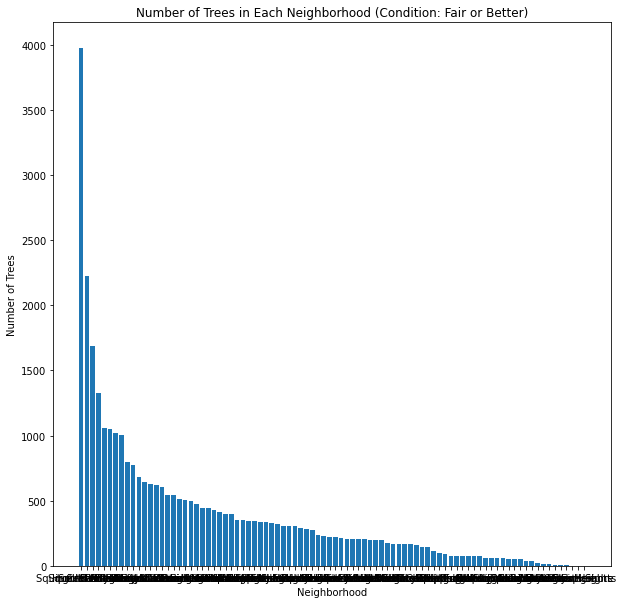

In [17]:
# Create an initial bar graph
plt.figure(figsize = (10,10))
plt.bar(group_neighborhood['neighborhood'], group_neighborhood['tree_count'])

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Trees')
plt.title('Number of Trees in Each Neighborhood (Condition: Fair or Better)')

plt.show()

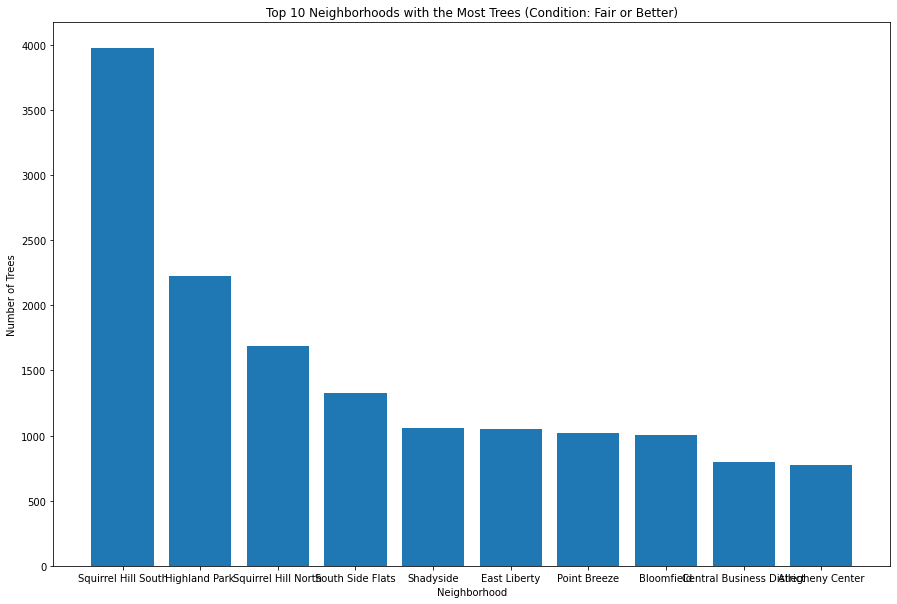

In [26]:
# Only displays top 10 neighborhoods
top_neighborhood = group_neighborhood.head(10)

# Create bar graph
plt.figure(figsize = (15,10))
plt.bar(top_neighborhood['neighborhood'], top_neighborhood['tree_count'])

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Trees')
plt.title('Top 10 Neighborhoods with the Most Trees (Condition: Fair or Better)')

plt.show()

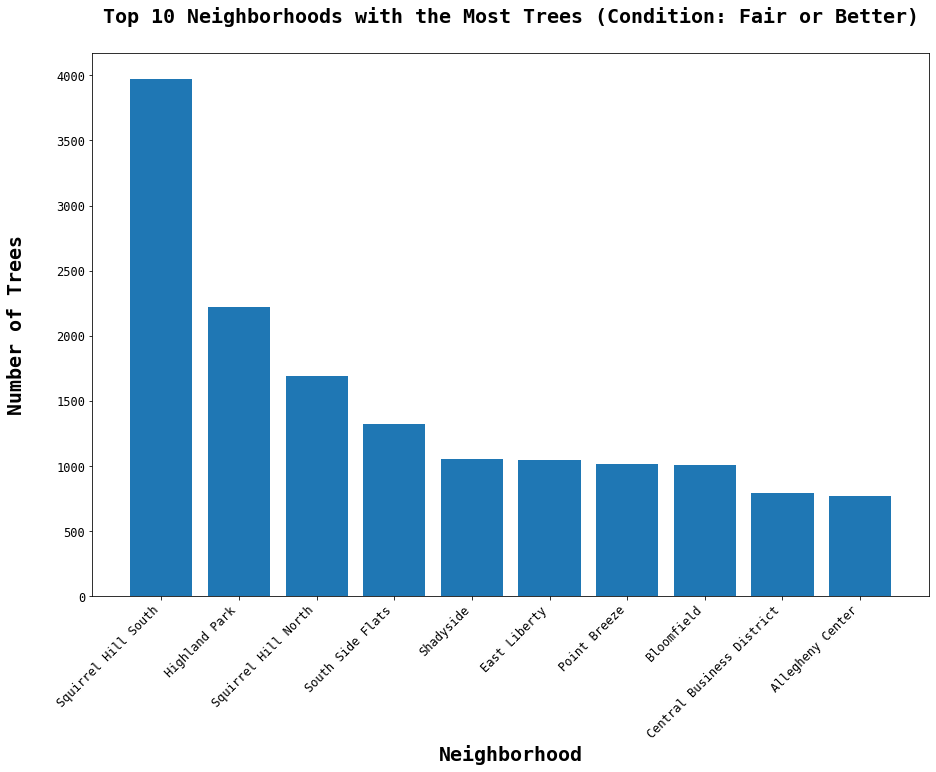

In [68]:
# Create bar graph
plt.figure(figsize = (15,10))
plt.bar(top_neighborhood['neighborhood'], top_neighborhood['tree_count'])

# Add labels and a title; Improved readability
plt.xlabel('Neighborhood', fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.ylabel('Number of Trees', fontsize = 20, labelpad = 30, fontname = 'monospace', weight = 'bold')
plt.title('Top 10 Neighborhoods with the Most Trees (Condition: Fair or Better)', fontname = 'monospace', fontsize = 20, pad = 30, weight = 'bold')

# Improve readability of tick labels
plt.xticks(rotation = 45, ha = 'right', fontname = 'monospace', size = 12, weight = 'normal')
plt.yticks(fontname = 'monospace', size = 12, weight = 'normal')

plt.show()

## **Conclusion:**

When referencing the graph which pertains the number of trees in each neighborhood, it is abundantly clear that Squirrel Hill South is the best neighborhood. This neighborhood almost contains an whopping 4000 trees, which is near double the next best neighborhood, Highland Park. With this many trees, Squirrel Hill South must be environmentally sound, as trees aid in the natural ecosystems ability to stay healthy and function normally. It also adds natural beauty to the neighborhood which is often ruined by urbanization and industrialization. Overall, it is clear that Squirrel Hill South represent the best neighborhood when considering the environment and more specifically, number of trees. 